In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

### **Word2Vec**

Data disimpan dalam file CSV: word_vectors2.csv


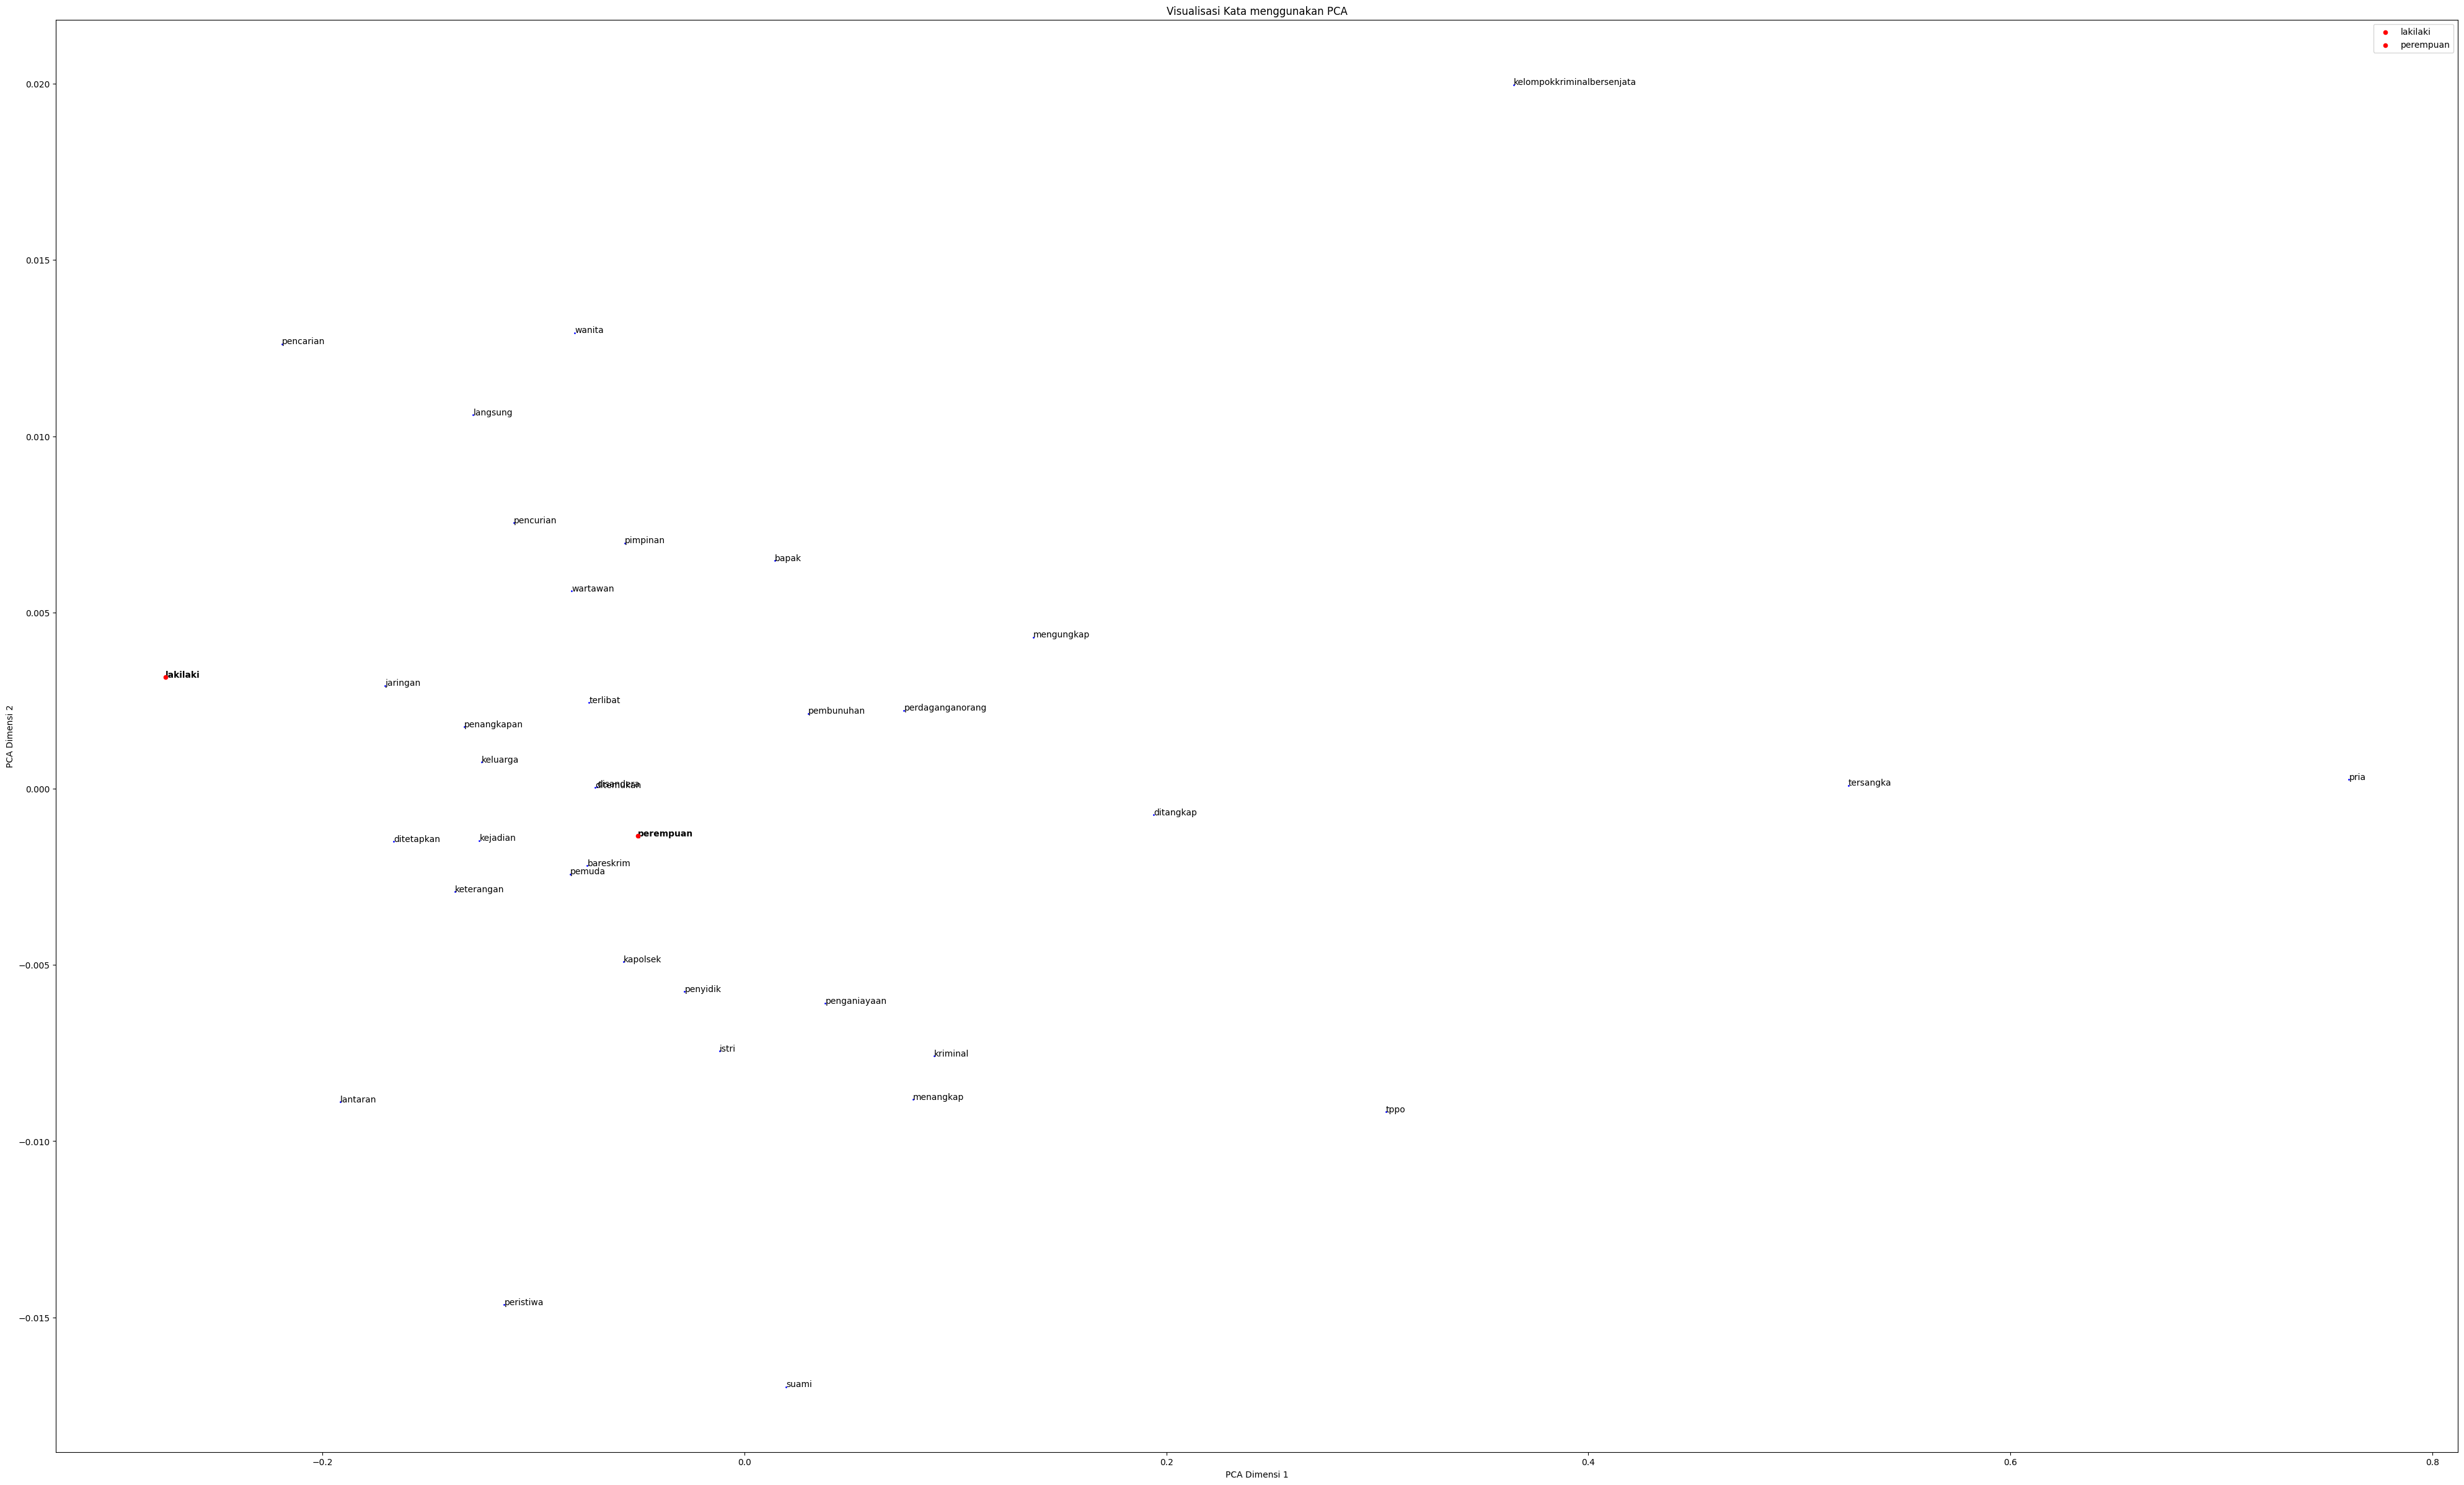

In [ ]:
# Fungsi untuk memuat vektor kata dari file .txt
def load_word_vectors(txt_file):
    word_vectors = {}
    with open(txt_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=float)
            word_vectors[word] = vector
    return word_vectors

# Memuat vektor kata dari file .txt
word_vectors = load_word_vectors('word_vectors4.txt')

# Daftar kata target
target_words = ["lakilaki","perempuan"]

# Inisialisasi list data
data = []

# Loop melalui kata-kata target
for target_word in target_words:
    if target_word in word_vectors:
        # Dapatkan vektor representasi kata
        target_vector = word_vectors[target_word]

        # Temukan kata-kata yang sering muncul di sekitar kata
        similar_words = [(word, 1 - pairwise_distances([target_vector], [word_vector], metric='cosine')[0][0])
                         for word, word_vector in word_vectors.items() if word != target_word]
        similar_words = sorted(similar_words, key=lambda x: x[1], reverse=True)[:35]

        data.append({"Word": target_word, "Similarity Score": 1.0, "Vector": target_vector.tolist(), "Distance": 0.0})
        for word, score in similar_words:
            word_vector = word_vectors[word]
            distance = pairwise_distances([target_vector], [word_vector], metric='cosine')[0][0]
            data.append({"Word": word, "Similarity Score": score, "Vector": word_vector.tolist(), "Distance": distance})

    else:
        print(f"Kata '{target_word}' tidak ada dalam model.")

# Simpan data ke dalam DataFrame
df = pd.DataFrame(data)

# Simpan DataFrame ke dalam file CSV
csv_file = "word_vectors2.csv"
df.to_csv(csv_file, index=False)

print(f"Data disimpan dalam file CSV: {csv_file}")

# Mengambil vektor representasi kata dari kamus model
words_to_visualize = target_words + [word for word, _ in similar_words]
word_vectors_np = np.array([word_vectors[word] for word in words_to_visualize])

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors_np)

# Membuat plot scatter untuk PCA
plt.figure(figsize=(50, 30))

# Plot kata target dengan warna dan ketebalan yang berbeda
for target_word in target_words:
    target_index = words_to_visualize.index(target_word)
    plt.scatter(word_vectors_pca[target_index, 0], word_vectors_pca[target_index, 1], color='red', s=20, label=target_word, zorder=10)
    plt.annotate(target_word, (word_vectors_pca[target_index, 0], word_vectors_pca[target_index, 1]), weight='bold')

# Plot kata-kata yang bukan target
for i, word in enumerate(words_to_visualize):
    if word not in target_words:
        plt.scatter(word_vectors_pca[i, 0], word_vectors_pca[i, 1], color='blue', s=1)
        plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.xlabel('PCA Dimensi 1')
plt.ylabel('PCA Dimensi 2')
plt.title('Visualisasi Kata menggunakan PCA')
plt.legend()
plt.show()


Data disimpan dalam file CSV: word_vectors_debiaslk.csv


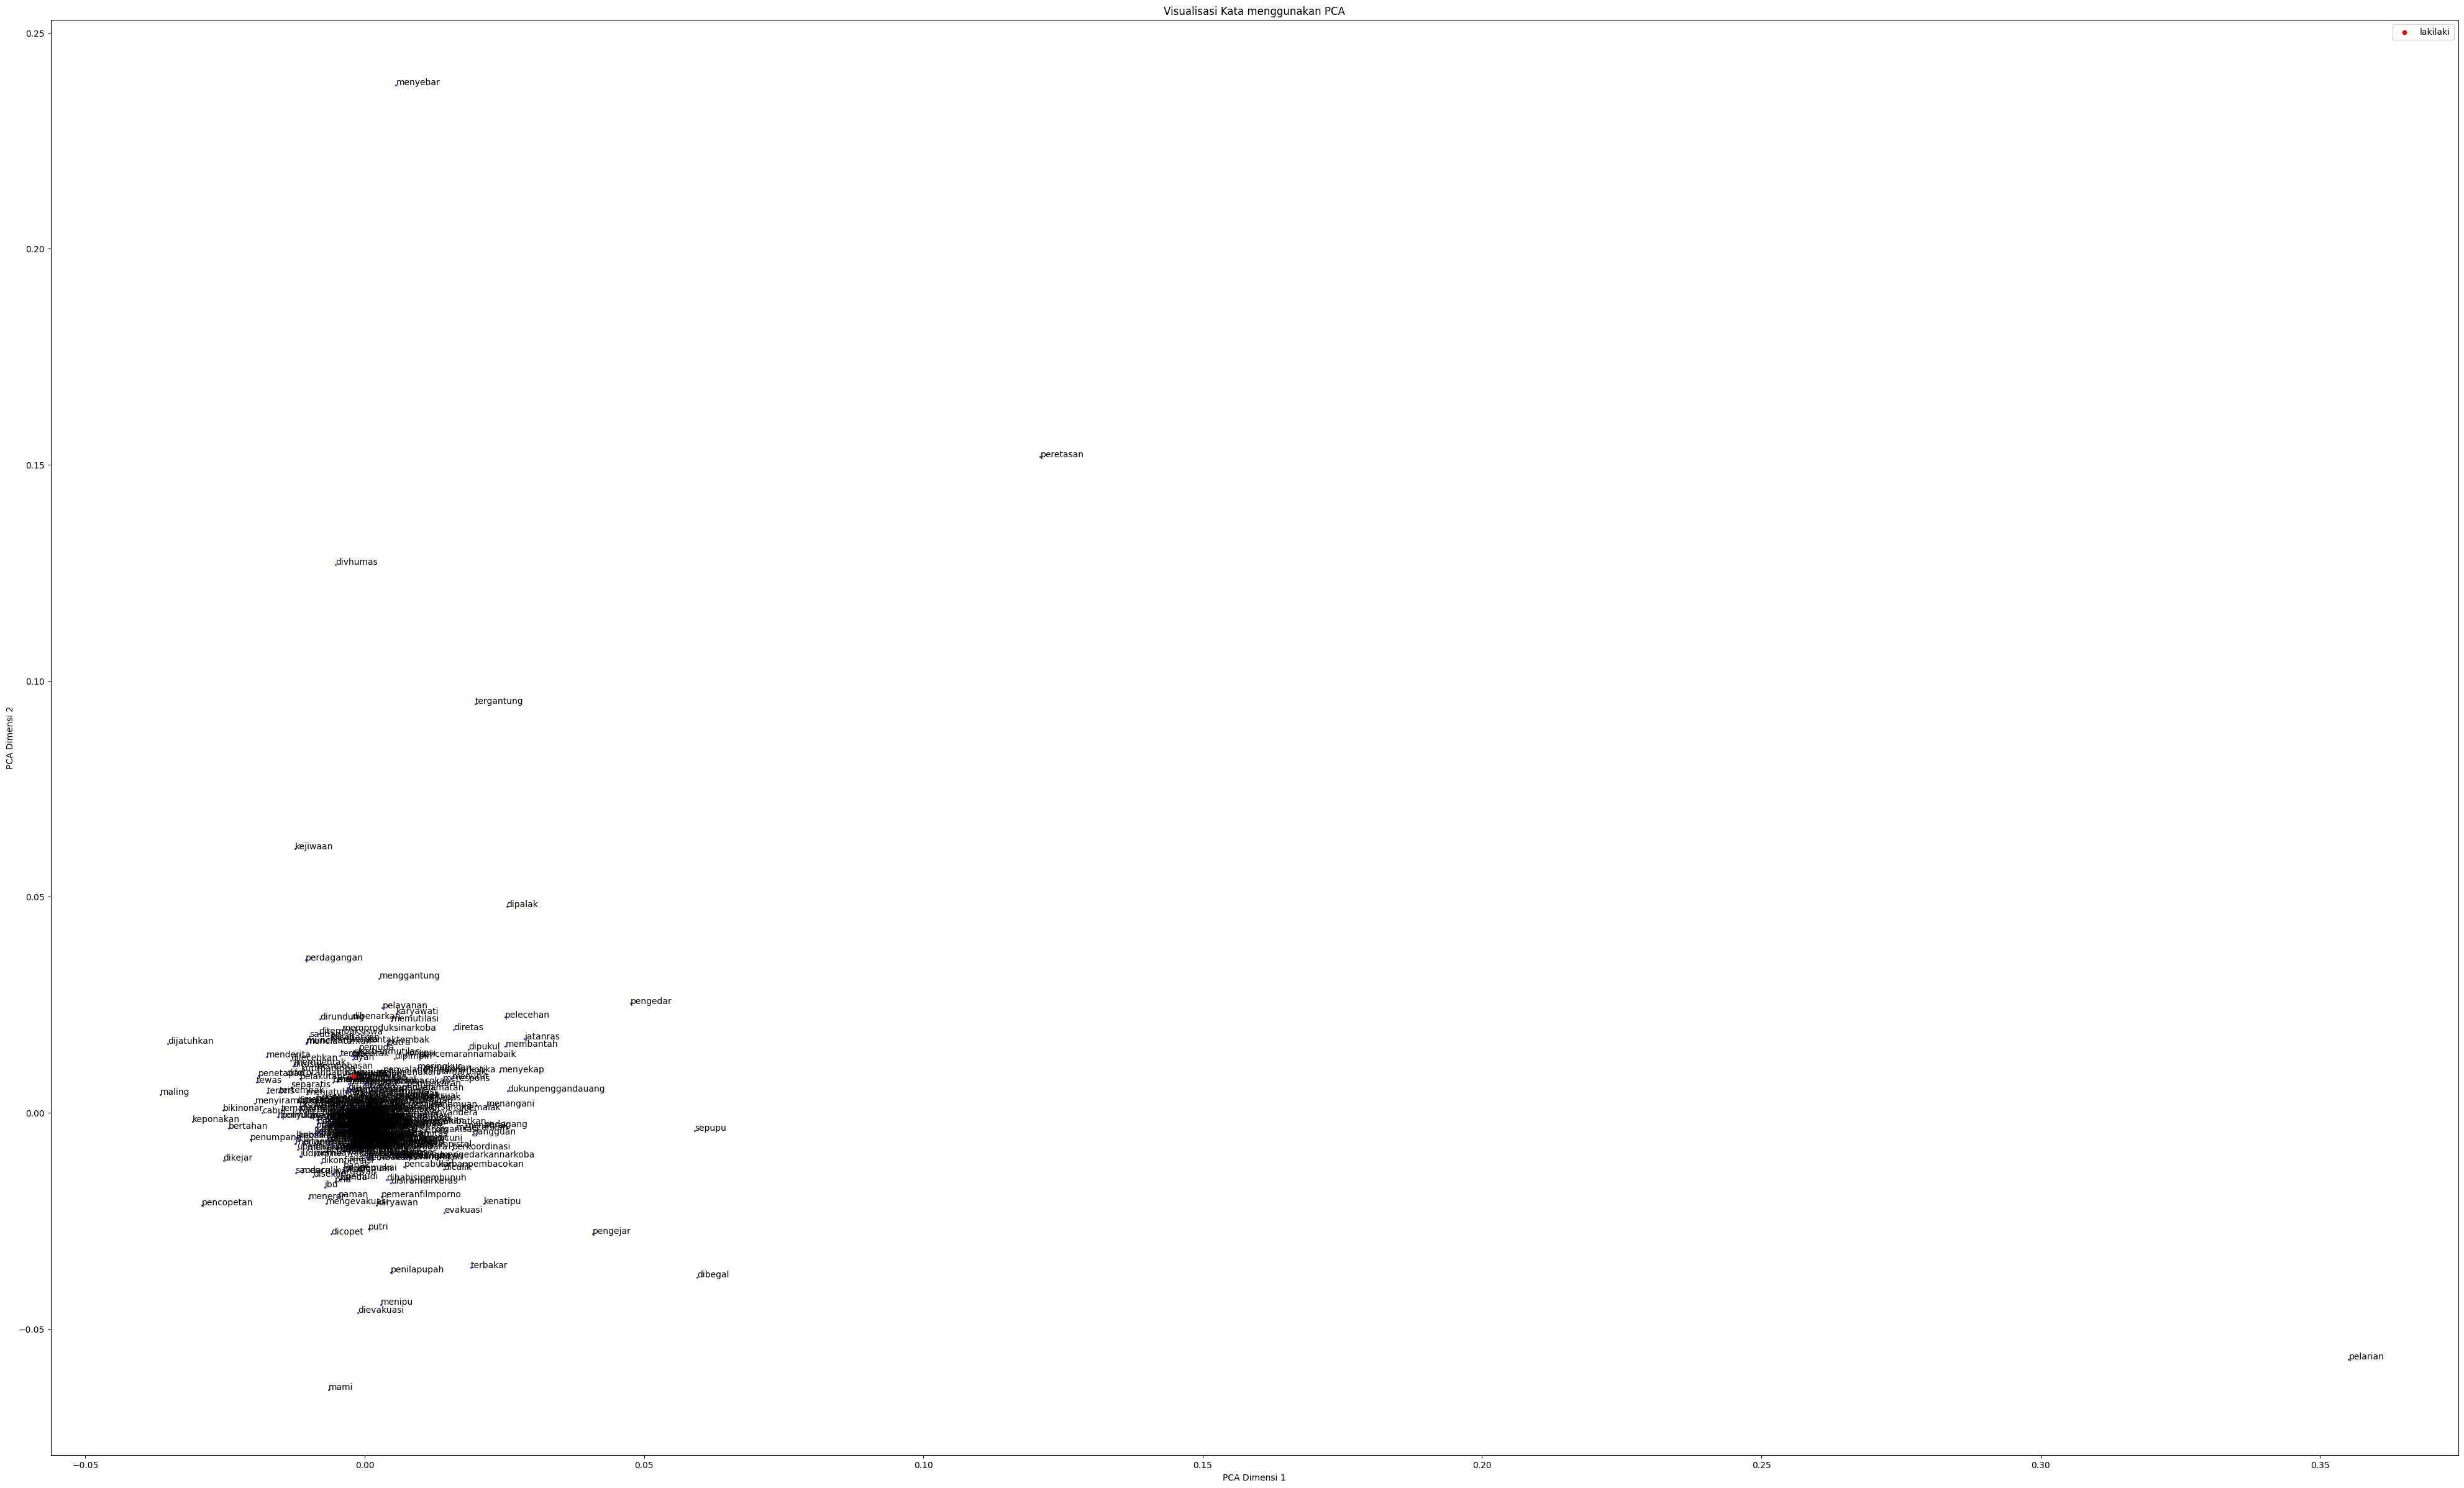

In [ ]:
# Fungsi untuk memuat vektor kata dari file .txt
def load_word_vectors(txt_file):
    word_vectors = {}
    with open(txt_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=float)
            word_vectors[word] = vector
    return word_vectors

# Memuat vektor kata dari file .txt
word_vectors = load_word_vectors('words_vectors_debiased.txt')

# Daftar kata target
target_words = ["lakilaki","perempuan"]

# Inisialisasi list data
data = []

# Loop melalui kata-kata target
for target_word in target_words:
    if target_word in word_vectors:
        # Dapatkan vektor representasi kata
        target_vector = word_vectors[target_word]

        # Temukan kata-kata yang sering muncul di sekitar kata
        similar_words = [(word, 1 - pairwise_distances([target_vector], [word_vector], metric='cosine')[0][0])
                         for word, word_vector in word_vectors.items() if word != target_word]
        similar_words = sorted(similar_words, key=lambda x: x[1], reverse=True)[:400]

        data.append({"Word": target_word, "Similarity Score": 1.0, "Vector": target_vector.tolist(), "Distance": 0.0})
        for word, score in similar_words:
            word_vector = word_vectors[word]
            distance = pairwise_distances([target_vector], [word_vector], metric='cosine')[0][0]
            data.append({"Word": word, "Similarity Score": score, "Vector": word_vector.tolist(), "Distance": distance})

    else:
        print(f"Kata '{target_word}' tidak ada dalam model.")

# Simpan data ke dalam DataFrame
df = pd.DataFrame(data)

# Simpan DataFrame ke dalam file CSV
csv_file = "word_vectors_debiaslk.csv"
df.to_csv(csv_file, index=False)

print(f"Data disimpan dalam file CSV: {csv_file}")

# Mengambil vektor representasi kata dari kamus model
words_to_visualize = target_words + [word for word, _ in similar_words]
word_vectors_np = np.array([word_vectors[word] for word in words_to_visualize])

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors_np)

# Membuat plot scatter untuk PCA
plt.figure(figsize=(50, 30))

# Plot kata target dengan warna dan ketebalan yang berbeda
for target_word in target_words:
    target_index = words_to_visualize.index(target_word)
    plt.scatter(word_vectors_pca[target_index, 0], word_vectors_pca[target_index, 1], color='red', s=20, label=target_word, zorder=10)
    plt.annotate(target_word, (word_vectors_pca[target_index, 0], word_vectors_pca[target_index, 1]), weight='bold')

# Plot kata-kata yang bukan target
for i, word in enumerate(words_to_visualize):
    if word not in target_words:
        plt.scatter(word_vectors_pca[i, 0], word_vectors_pca[i, 1], color='blue', s=1)
        plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.xlabel('PCA Dimensi 1')
plt.ylabel('PCA Dimensi 2')
plt.title('Visualisasi Kata menggunakan PCA')
plt.legend()
plt.show()


### **FastText**

Data disimpan dalam file CSV: fasttext_vectorspr.csv


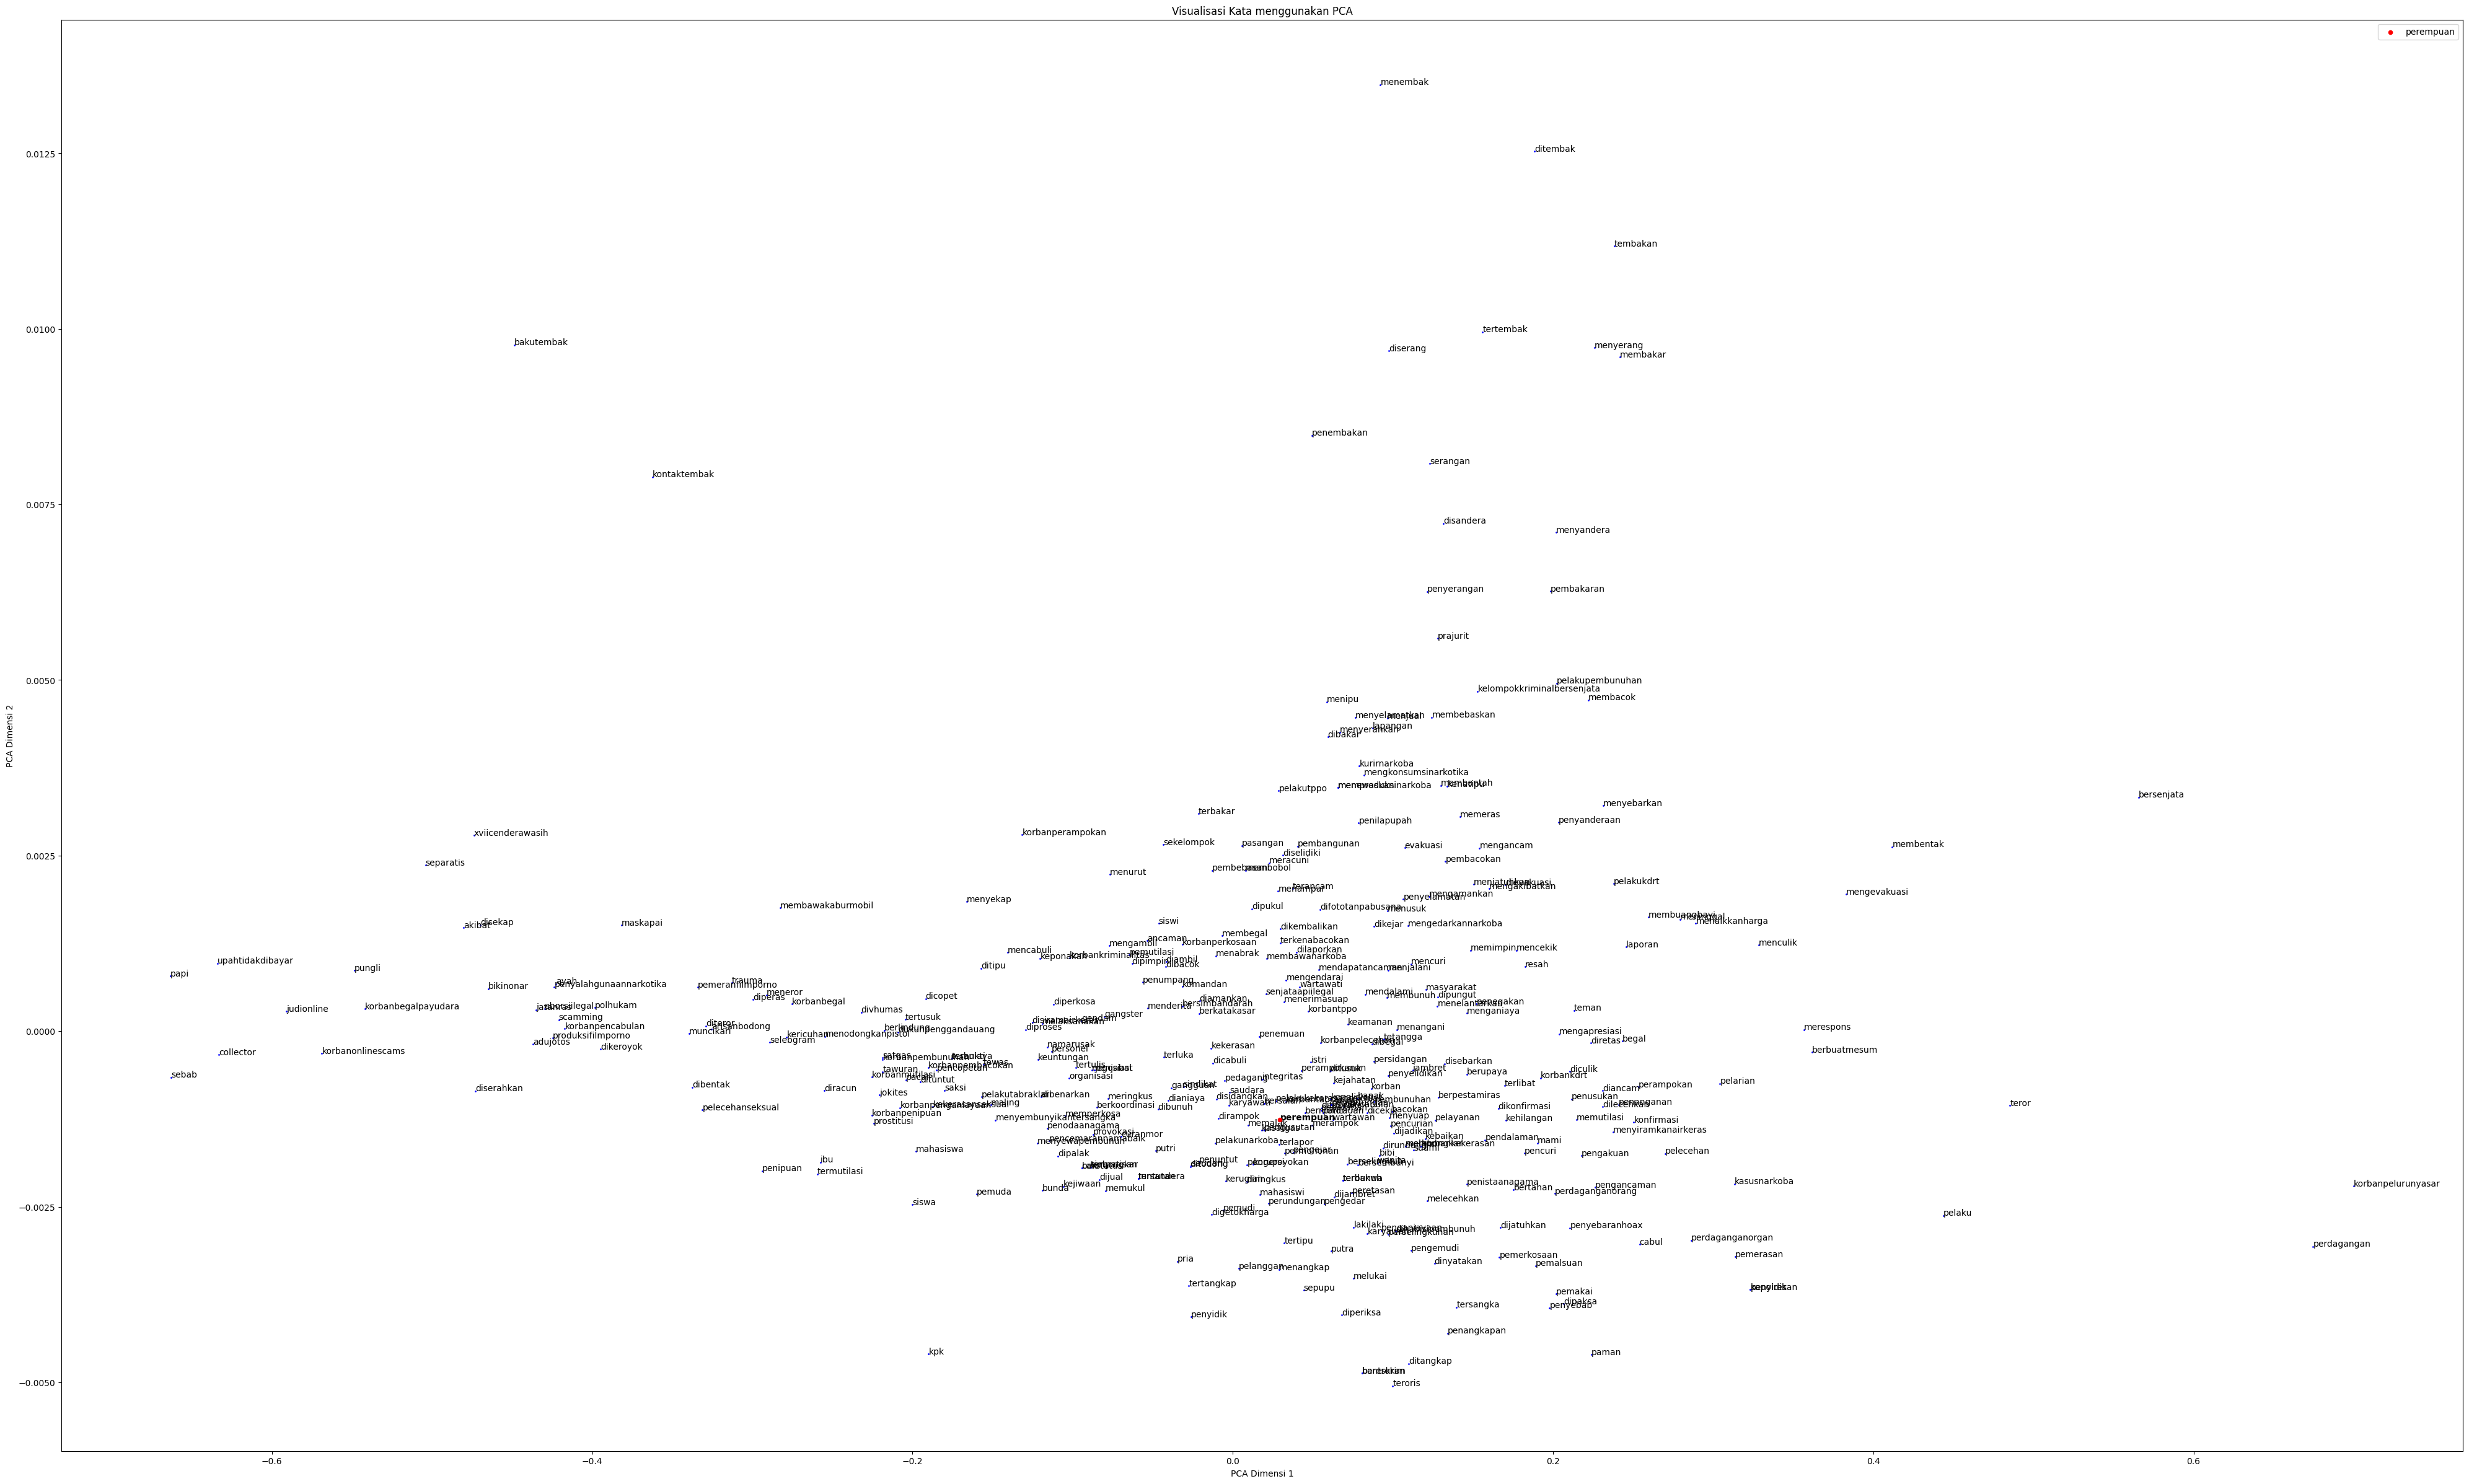

In [ ]:
# Fungsi untuk memuat vektor kata dari file .txt
def load_word_vectors(txt_file):
    word_vectors = {}
    with open(txt_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=float)
            word_vectors[word] = vector
    return word_vectors

# Memuat vektor kata dari file .txt
word_vectors = load_word_vectors('fasttext_vectors.txt')

# Daftar kata target
target_words = ["lakilaki","perempuan"]

# Inisialisasi list data
data = []

# Loop melalui kata-kata target
for target_word in target_words:
    if target_word in word_vectors:
        # Dapatkan vektor representasi kata
        target_vector = word_vectors[target_word]

        # Temukan kata-kata yang sering muncul di sekitar kata
        similar_words = [(word, 1 - pairwise_distances([target_vector], [word_vector], metric='cosine')[0][0])
                         for word, word_vector in word_vectors.items() if word != target_word]
        similar_words = sorted(similar_words, key=lambda x: x[1], reverse=True)[:400]

        data.append({"Word": target_word, "Similarity Score": 1.0, "Vector": target_vector.tolist(), "Distance": 0.0})
        for word, score in similar_words:
            word_vector = word_vectors[word]
            distance = pairwise_distances([target_vector], [word_vector], metric='cosine')[0][0]
            data.append({"Word": word, "Similarity Score": score, "Vector": word_vector.tolist(), "Distance": distance})

    else:
        print(f"Kata '{target_word}' tidak ada dalam model.")

# Simpan data ke dalam DataFrame
df = pd.DataFrame(data)

# Simpan DataFrame ke dalam file CSV
csv_file = "fasttext_vectorspr.csv"
df.to_csv(csv_file, index=False)

print(f"Data disimpan dalam file CSV: {csv_file}")

# Mengambil vektor representasi kata dari kamus model
words_to_visualize = target_words + [word for word, _ in similar_words]
word_vectors_np = np.array([word_vectors[word] for word in words_to_visualize])

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors_np)

# Membuat plot scatter untuk PCA
plt.figure(figsize=(50, 30))

# Plot kata target dengan warna dan ketebalan yang berbeda
for target_word in target_words:
    target_index = words_to_visualize.index(target_word)
    plt.scatter(word_vectors_pca[target_index, 0], word_vectors_pca[target_index, 1], color='red', s=20, label=target_word, zorder=10)
    plt.annotate(target_word, (word_vectors_pca[target_index, 0], word_vectors_pca[target_index, 1]), weight='bold')

# Plot kata-kata yang bukan target
for i, word in enumerate(words_to_visualize):
    if word not in target_words:
        plt.scatter(word_vectors_pca[i, 0], word_vectors_pca[i, 1], color='blue', s=1)
        plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.xlabel('PCA Dimensi 1')
plt.ylabel('PCA Dimensi 2')
plt.title('Visualisasi Kata menggunakan PCA')
plt.legend()
plt.show()


Data disimpan dalam file CSV: fasttext_vector_debiaspr.csv


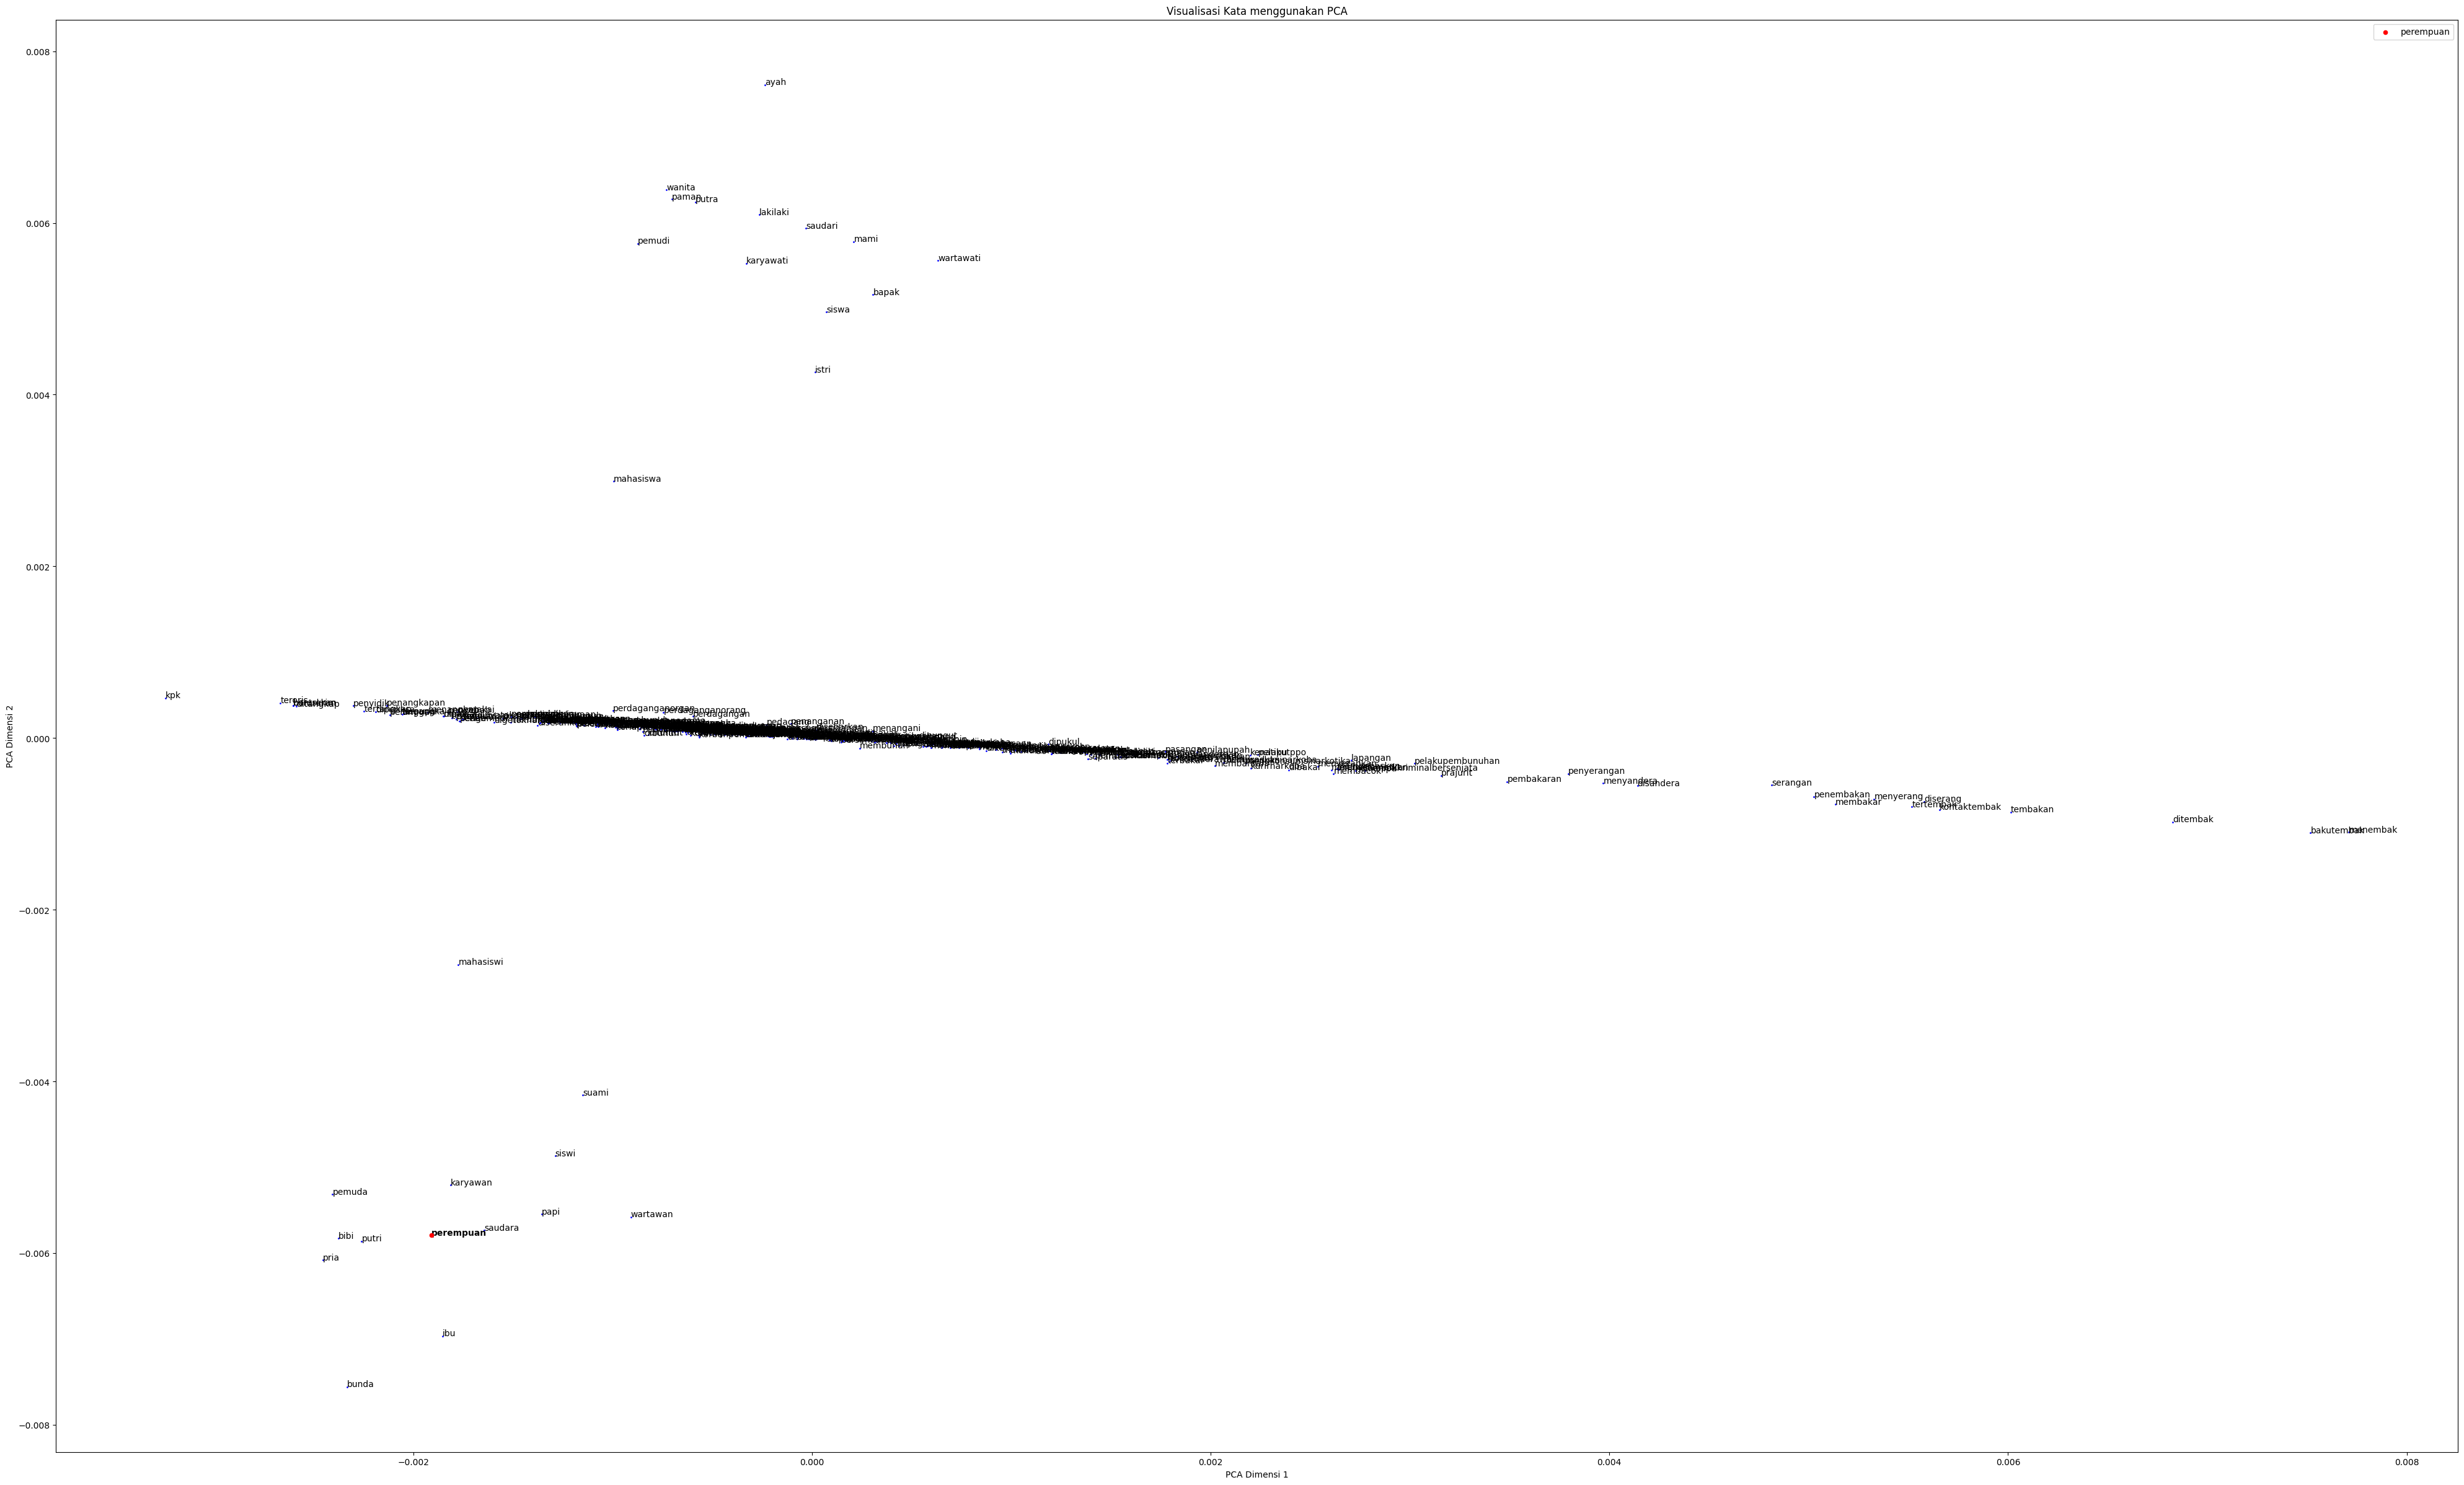

In [ ]:
# Fungsi untuk memuat vektor kata dari file .txt
def load_word_vectors(txt_file):
    word_vectors = {}
    with open(txt_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=float)
            word_vectors[word] = vector
    return word_vectors

# Memuat vektor kata dari file .txt
word_vectors = load_word_vectors('fasttext_vectors_debiased.txt')

# Daftar kata target
target_words = ["lakilaki","perempuan"]

# Inisialisasi list data
data = []

# Loop melalui kata-kata target
for target_word in target_words:
    if target_word in word_vectors:
        # Dapatkan vektor representasi kata
        target_vector = word_vectors[target_word]

        # Temukan kata-kata yang sering muncul di sekitar kata
        similar_words = [(word, 1 - pairwise_distances([target_vector], [word_vector], metric='cosine')[0][0])
                         for word, word_vector in word_vectors.items() if word != target_word]
        similar_words = sorted(similar_words, key=lambda x: x[1], reverse=True)[:400]

        data.append({"Word": target_word, "Similarity Score": 1.0, "Vector": target_vector.tolist(), "Distance": 0.0})
        for word, score in similar_words:
            word_vector = word_vectors[word]
            distance = pairwise_distances([target_vector], [word_vector], metric='cosine')[0][0]
            data.append({"Word": word, "Similarity Score": score, "Vector": word_vector.tolist(), "Distance": distance})

    else:
        print(f"Kata '{target_word}' tidak ada dalam model.")

# Simpan data ke dalam DataFrame
df = pd.DataFrame(data)

# Simpan DataFrame ke dalam file CSV
csv_file = "fasttext_vector_debiaspr.csv"
df.to_csv(csv_file, index=False)

print(f"Data disimpan dalam file CSV: {csv_file}")

# Mengambil vektor representasi kata dari kamus model
words_to_visualize = target_words + [word for word, _ in similar_words]
word_vectors_np = np.array([word_vectors[word] for word in words_to_visualize])

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors_np)

# Membuat plot scatter untuk PCA
plt.figure(figsize=(50, 30))

# Plot kata target dengan warna dan ketebalan yang berbeda
for target_word in target_words:
    target_index = words_to_visualize.index(target_word)
    plt.scatter(word_vectors_pca[target_index, 0], word_vectors_pca[target_index, 1], color='red', s=20, label=target_word, zorder=10)
    plt.annotate(target_word, (word_vectors_pca[target_index, 0], word_vectors_pca[target_index, 1]), weight='bold')

# Plot kata-kata yang bukan target
for i, word in enumerate(words_to_visualize):
    if word not in target_words:
        plt.scatter(word_vectors_pca[i, 0], word_vectors_pca[i, 1], color='blue', s=1)
        plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.xlabel('PCA Dimensi 1')
plt.ylabel('PCA Dimensi 2')
plt.title('Visualisasi Kata menggunakan PCA')
plt.legend()
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


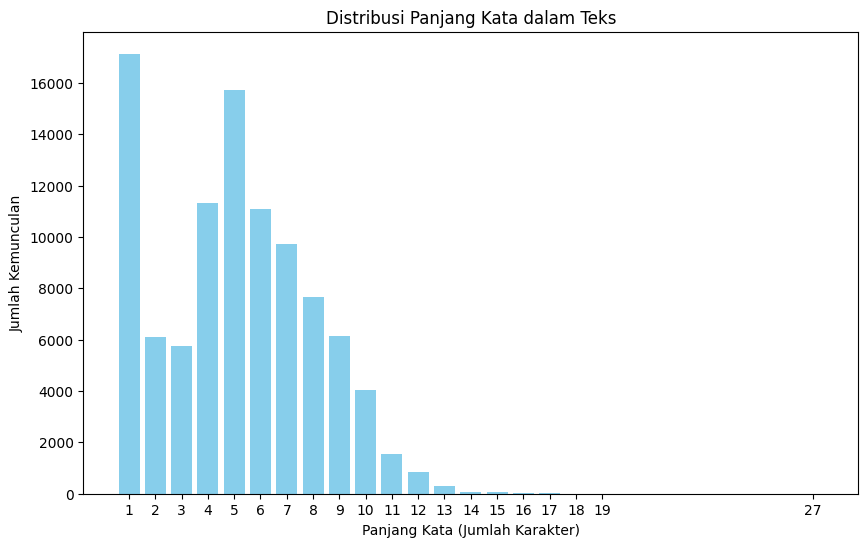

Kata dengan 1 karakter muncul sebanyak 17136 kali
Kata dengan 2 karakter muncul sebanyak 6102 kali
Kata dengan 3 karakter muncul sebanyak 5757 kali
Kata dengan 4 karakter muncul sebanyak 11321 kali
Kata dengan 5 karakter muncul sebanyak 15718 kali
Kata dengan 6 karakter muncul sebanyak 11088 kali
Kata dengan 7 karakter muncul sebanyak 9720 kali
Kata dengan 8 karakter muncul sebanyak 7679 kali
Kata dengan 9 karakter muncul sebanyak 6139 kali
Kata dengan 10 karakter muncul sebanyak 4054 kali
Kata dengan 11 karakter muncul sebanyak 1544 kali
Kata dengan 12 karakter muncul sebanyak 828 kali
Kata dengan 13 karakter muncul sebanyak 309 kali
Kata dengan 14 karakter muncul sebanyak 77 kali
Kata dengan 15 karakter muncul sebanyak 51 kali
Kata dengan 16 karakter muncul sebanyak 12 kali
Kata dengan 17 karakter muncul sebanyak 10 kali
Kata dengan 18 karakter muncul sebanyak 3 kali
Kata dengan 19 karakter muncul sebanyak 2 kali
Kata dengan 27 karakter muncul sebanyak 1 kali

Kata-kata dengan 27 kar

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Memastikan bahwa kita memiliki data NLTK yang diperlukan
nltk.download('punkt')

# Memuat data dari file CSV
file_path = 'summary.csv'  # Ganti dengan path ke file CSV Anda
data = pd.read_csv(file_path)

# Mengekstrak teks dari kolom "Summary"
summaries = data['Summary'].dropna().tolist()

# Menggabungkan semua teks menjadi satu string besar
all_text = ' '.join(summaries)

# Melakukan tokenisasi
words = word_tokenize(all_text)

# Menghitung jumlah kemunculan kata berdasarkan panjang karakter
word_lengths = [len(word) for word in words]
length_counts = Counter(word_lengths)

# Mengonversi hasil perhitungan ke dalam bentuk yang bisa dipakai oleh matplotlib
lengths = list(length_counts.keys())
counts = list(length_counts.values())

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.bar(lengths, counts, color='skyblue')
plt.xlabel('Panjang Kata (Jumlah Karakter)')
plt.ylabel('Jumlah Kemunculan')
plt.title('Distribusi Panjang Kata dalam Teks')
plt.xticks(lengths)  # Memastikan bahwa semua panjang kata muncul pada sumbu x
plt.show()

# Menampilkan jumlah kata berdasarkan panjang karakter
for length, count in sorted(length_counts.items()):
    print(f"Kata dengan {length} karakter muncul sebanyak {count} kali")

# Menampilkan kata-kata yang memiliki 27 karakter
words_with_27_characters = [word for word in words if len(word) == 27]
print("\nKata-kata dengan 27 karakter:")
print(words_with_27_characters)

### **TRY**

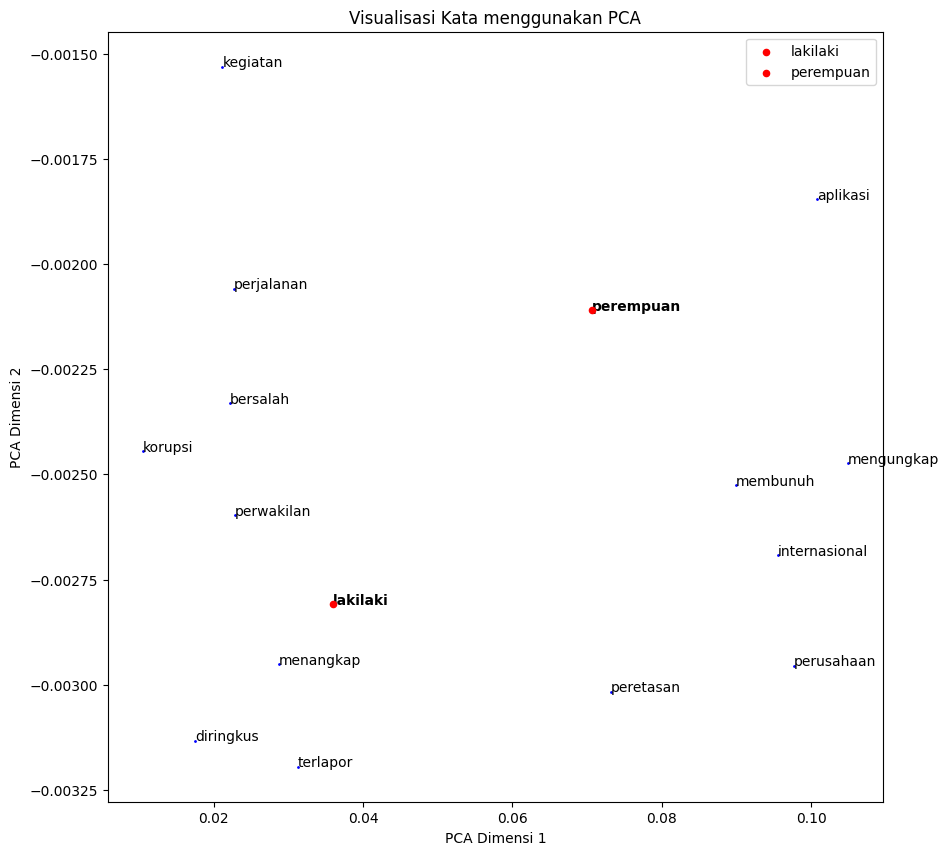

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat data PCA dari file CSV
pca_csv_file = "fasttext_vectors_pca200.csv"
pca_df = pd.read_csv(pca_csv_file)

# Daftar kata target
target_words = ["lakilaki", "perempuan"]

# Membuat plot scatter untuk PCA
plt.figure(figsize=(10, 10))

# Plot kata target dengan warna dan ketebalan yang berbeda
for target_word in target_words:
    target_data = pca_df[pca_df['Word'] == target_word]
    plt.scatter(target_data['Dimensi 1'], target_data['Dimensi 2'], color='red', s=20, label=target_word, zorder=10)
    for i, row in target_data.iterrows():
        plt.annotate(row['Word'], (row['Dimensi 1'], row['Dimensi 2']), weight='bold')

# Plot kata-kata yang bukan target
for i, row in pca_df.iterrows():
    if row['Word'] not in target_words:
        plt.scatter(row['Dimensi 1'], row['Dimensi 2'], color='blue', s=1)
        plt.annotate(row['Word'], (row['Dimensi 1'], row['Dimensi 2']))

plt.xlabel('PCA Dimensi 1')
plt.ylabel('PCA Dimensi 2')
plt.title('Visualisasi Kata menggunakan PCA')
plt.legend()
plt.show()


## **TRY 2**

Data PCA disimpan dalam file CSV: fasttext_vectors_pcaw2.csv


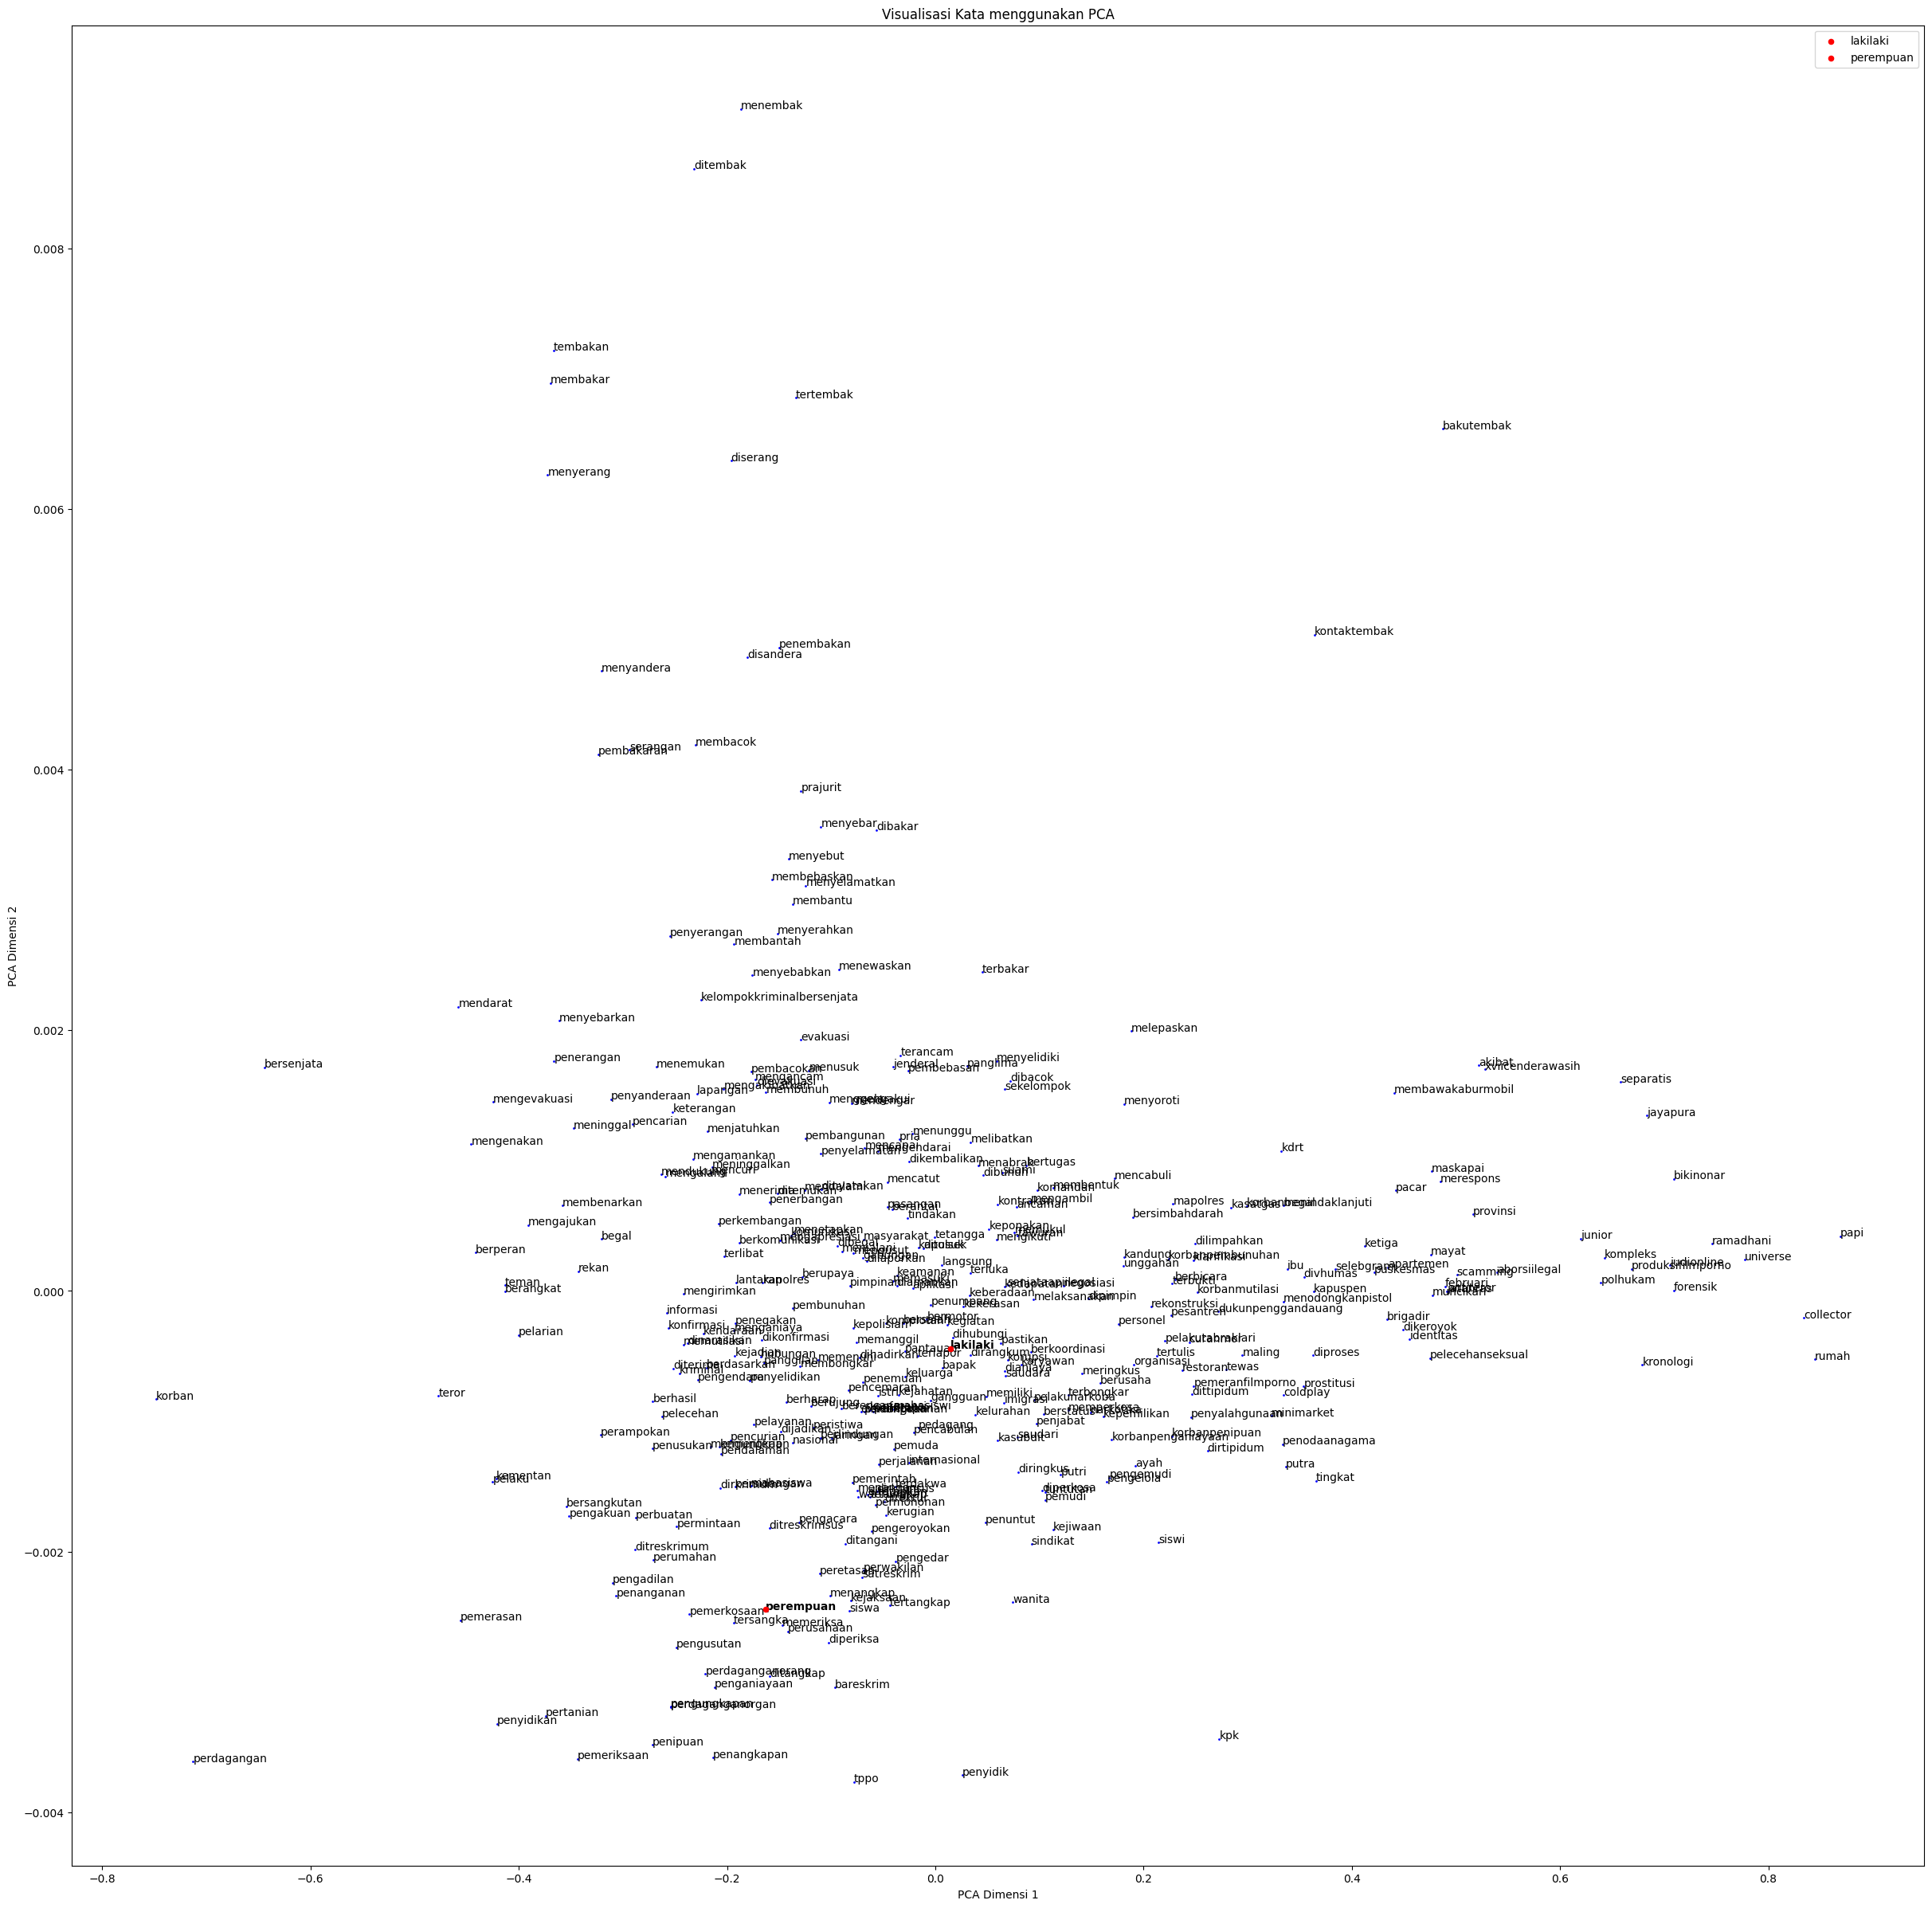

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fungsi untuk memuat vektor kata dari file .txt
def load_word_vectors(txt_file):
    word_vectors = {}
    with open(txt_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=float)
            word_vectors[word] = vector
    return word_vectors

# Memuat vektor kata dari file .txt
word_vectors = load_word_vectors('fasttext_vectorsw2.txt')

# Daftar kata target
target_words = ["lakilaki", "perempuan"]

# Inisialisasi list data
data = []

# Loop melalui kata-kata target
for target_word in target_words:
    if target_word in word_vectors:
        # Dapatkan vektor representasi kata
        target_vector = word_vectors[target_word]

        # Temukan kata-kata yang sering muncul di sekitar kata
        similar_words = [(word, 1 - pairwise_distances([target_vector], [word_vector], metric='cosine')[0][0])
                         for word, word_vector in word_vectors.items() if word != target_word]
        similar_words = sorted(similar_words, key=lambda x: x[1], reverse=True)[:400]

        data.append({"Word": target_word, "Similarity Score": 1.0, "Vector": target_vector.tolist(), "Distance": 0.0})
        for word, score in similar_words:
            word_vector = word_vectors[word]
            distance = pairwise_distances([target_vector], [word_vector], metric='cosine')[0][0]
            data.append({"Word": word, "Similarity Score": score, "Vector": word_vector.tolist(), "Distance": distance})

    else:
        print(f"Kata '{target_word}' tidak ada dalam model.")

# Simpan data ke dalam DataFrame
# df = pd.DataFrame(data)

# Simpan DataFrame ke dalam file CSV
# csv_file = "word_vectorspr.csv"
# df.to_csv(csv_file, index=False)

# print(f"Data disimpan dalam file CSV: {csv_file}")

# Mengambil vektor representasi kata dari kamus model
words_to_visualize = target_words + [word for word, _ in similar_words]
word_vectors_np = np.array([word_vectors[word] for word in words_to_visualize])

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors_np)

# Menyimpan hasil PCA dalam DataFrame
pca_df = pd.DataFrame({
    'Word': words_to_visualize,
    'Dimensi 1': word_vectors_pca[:, 0],
    'Dimensi 2': word_vectors_pca[:, 1]
})

# Simpan DataFrame hasil PCA ke dalam file CSV
pca_csv_file = "fasttext_vectors_pcaw2.csv"
pca_df.to_csv(pca_csv_file, index=False)

print(f"Data PCA disimpan dalam file CSV: {pca_csv_file}")

# Membuat plot scatter untuk PCA
plt.figure(figsize=(30, 30))

# Plot kata target dengan warna dan ketebalan yang berbeda
for target_word in target_words:
    target_index = words_to_visualize.index(target_word)
    plt.scatter(word_vectors_pca[target_index, 0], word_vectors_pca[target_index, 1], color='red', s=20, label=target_word, zorder=10)
    plt.annotate(target_word, (word_vectors_pca[target_index, 0], word_vectors_pca[target_index, 1]), weight='bold')

# Plot kata-kata yang bukan target
for i, word in enumerate(words_to_visualize):
    if word not in target_words:
        plt.scatter(word_vectors_pca[i, 0], word_vectors_pca[i, 1], color='blue', s=1)
        plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.xlabel('PCA Dimensi 1')
plt.ylabel('PCA Dimensi 2')
plt.title('Visualisasi Kata menggunakan PCA')
plt.legend()
plt.show()
